# Introdução a Machine Learning - Parte 4

In [4]:
import pandas as pd

In [5]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

df = pd.read_csv(uri)
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [6]:
# Renomear colunas
renomear = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}

df = df.rename(columns = renomear)
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [7]:
df['vendido'].replace('yes', 1, inplace=True)
df['vendido'].replace('no', 0, inplace=True)

df.head()


,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [8]:
from datetime import datetime
 

In [9]:
#ano_atual = datetime.today().year  Posso utilizar o ano atual, porém para seguir o exemplo do video será utilizado o ano de 2018
#ano_atual

In [10]:
df['idade_do_modelo'] = 2018 - df.ano_do_modelo
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,18
1,1,7843,1998,40557.96,1,20
2,2,7109,2006,89627.50,0,12
3,3,26823,2015,95276.14,0,3
4,4,7935,2014,117384.68,1,4


In [11]:
# Converter milhas
converte = 1.60934
df['km_por_ano'] = df.milhas_por_ano * converte
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,18,35085.22134
1,1,7843,1998,40557.96,1,20,12622.05362
2,2,7109,2006,89627.50,0,12,11440.79806
3,3,26823,2015,95276.14,0,3,43167.32682
4,4,7935,2014,117384.68,1,4,12770.11290


In [12]:
# Excluir colunas
df = df.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'] )


In [13]:
df.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


### Classificando

In [14]:
x = df[['preco','idade_do_modelo','km_por_ano']]
y = df[['vendido']]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20 

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,stratify=y,random_state=SEED, 
test_size = 0.25) 

modelo = LinearSVC(random_state = SEED)  
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)


acuracia = accuracy_score(teste_y, previsoes) * 100


C:\Users\ferda\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ferda\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [16]:

print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos')
print(f'A acuracia foi de % .2f%%' % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acuracia foi de  58.00%


## Dummy Classifiers - Cria um baseline para testar a acuracia
### Será criado dois Baseline seguindo argumentos fornecidos para o DummyClassifier
### *stratified* - Gera previsões aleatorias
### *most_frequent*  - Gera a previsão mais frequente

In [17]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(treino_x, treino_y)
prev = dummy.predict(teste_x)

acuracia_dummy = accuracy_score(teste_y, prev) * 100

In [18]:
print(f'A acuracia do dummy MOST FREQUENT foi de % .2f%%' % acuracia_dummy)

A acuracia do dummy MOST FREQUENT foi de  58.00%


In [19]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='stratified')
dummy.fit(treino_x, treino_y)
prev = dummy.predict(teste_x)

acuracia_dummy = accuracy_score(teste_y, prev) * 100

In [20]:
print(f'A acuracia do dummy STRATIFIED foi de % .2f%%' % acuracia_dummy)

A acuracia do dummy STRATIFIED foi de  52.16%


In [21]:
#FORMA MAIS DIRETA SEM UTILIZAR O PREDICT 
dummy = DummyClassifier(strategy='stratified')
dummy.fit(treino_x, treino_y)
acuracia_dummy = dummy.score(teste_x, teste_y) * 100 # Necessário passar o x e y

print(f'A acuracia do dummy direta foi de % .2f%%' % acuracia_dummy)

A acuracia do dummy direta foi de  51.16%


### Árvore de decisão e visualizando as decisões de um estimador

In [22]:
# importando o modo graphviz
!pip install graphviz

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 20 

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,stratify=y,random_state=SEED, 
test_size = 0.25) 

modelo = DecisionTreeClassifier(max_depth=2) #MAX_DEPTH - profundidade maxima de visualização da árvore
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)


acuracia = accuracy_score(teste_y, previsoes) * 100

In [24]:
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos')
print(f'A acuracia foi de % .2f%%' % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acuracia foi de  75.84%


In [25]:
# Exportar uma visualização
from sklearn.tree import export_graphviz
import graphviz

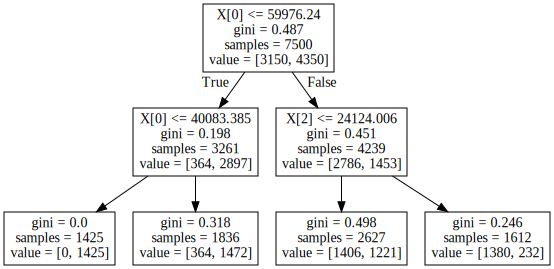

In [30]:
dot_data = export_graphviz(modelo, out_file=None)  #export_graphviz devolve o formato texto de uma gráfico
grafico = graphviz.Source(dot_data)
grafico

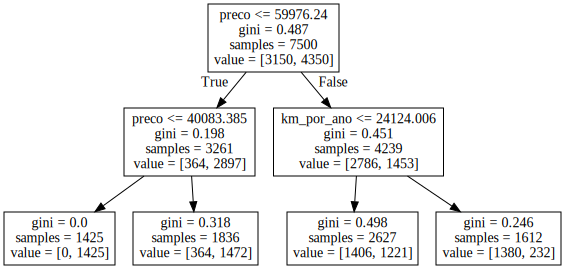

In [27]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None, feature_names = features)  # Adicionar os nomes das features de acordo com as colunas
grafico = graphviz.Source(dot_data)
grafico

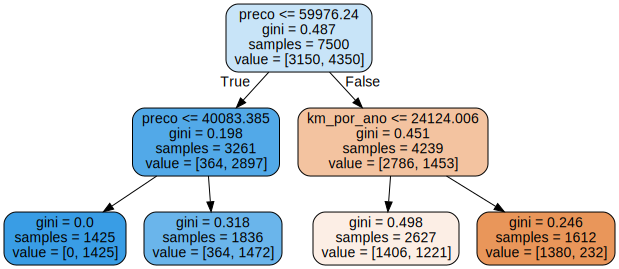

In [25]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None, feature_names = features, filled=True, rounded = True)  
grafico = graphviz.Source(dot_data)
grafico

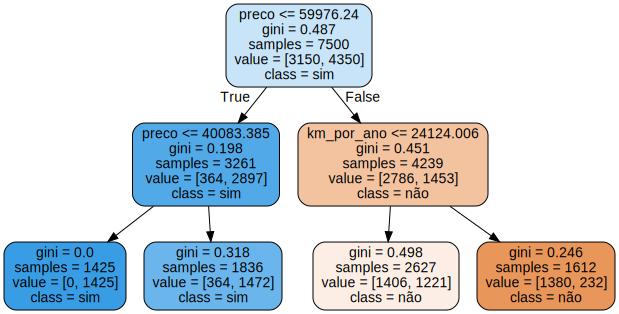

In [26]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None, feature_names = features, filled=True, rounded = True, class_names= ['não', 'sim'])  
grafico = graphviz.Source(dot_data)
grafico